# **Kidney Disease Prediction Model**



[Click here for the Kaggle Dataset](https://www.kaggle.com/datasets/mansoordaku/ckdisease)

## Step 1: Import the necessary libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

#for data manipulation
import pandas as pd
import numpy as np

#for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#for data modelling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
import xgboost as xgb
import pickle

#for model evaluation
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance

## Step 2: Load the dataset

In [3]:
df = pd.read_csv(r'/workspaces/Kidney-Disease-Prediction-Model/Data/data.csv')

## Step 3: Introductory Insights

Obtain introductory information such as shape of the data, number of rows, number of columns, etc.

In [4]:
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.tail(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,131.0,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [6]:
print('Information about the columns and its datatypes')
df.info()

print('\nShape of the data')
print(df.shape)
row, col = df.shape

print('Number of Rows :', row)
print('Number of Columns :', col)

Information about the columns and its datatypes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    

## Step 4: Statistical Insights

Obtain the mean, standard deviation, etc. from the data

In [7]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


## Step 5: Data Cleaning

Handling outliers, duplicates and missing values

### Missing Values

In [9]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

### Duplicate Values

In [10]:
df.duplicated().sum()

0

### Outliers

Some outliers represent natural variations in the population, and they should be left as is in your dataset. These are called true outliers. Other outliers are problematic and should be removed because they represent measurement errors, data entry or processing errors, or poor sampling.

### Age


<Axes: xlabel='age'>

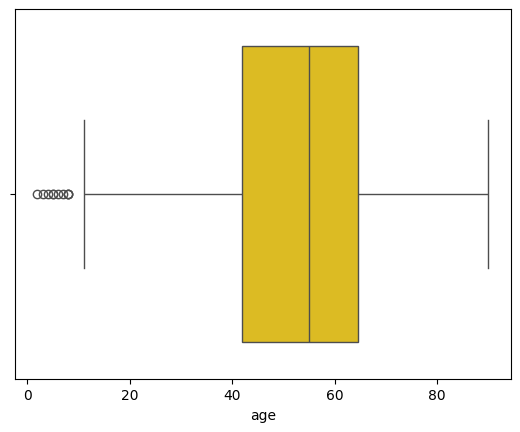

In [13]:
sns.boxplot(x = 'age', data=df, color='#fbcf04')

### blood pressure

<Axes: xlabel='bp'>

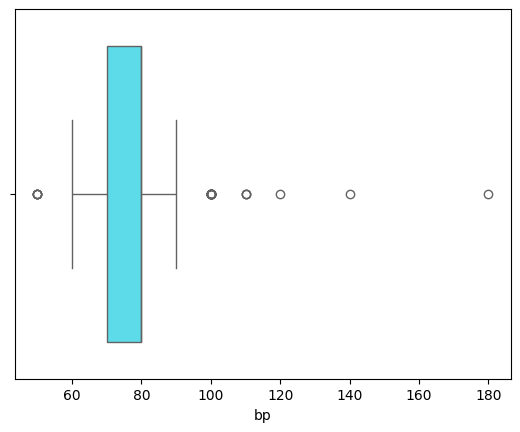

In [14]:
sns.boxplot(x = 'bp', data=df, color='#47EEFF')

The outliers above are problematic. To have a Resting Blood Pressure of below 60 and above 130 is practically impossible, hence we will be removing them.

In [15]:
df = df[df['bp']>=60]
df = df[df['bp']<=130]

In [16]:
df.shape

(381, 25)

### Specific gravity

<Axes: xlabel='sg'>

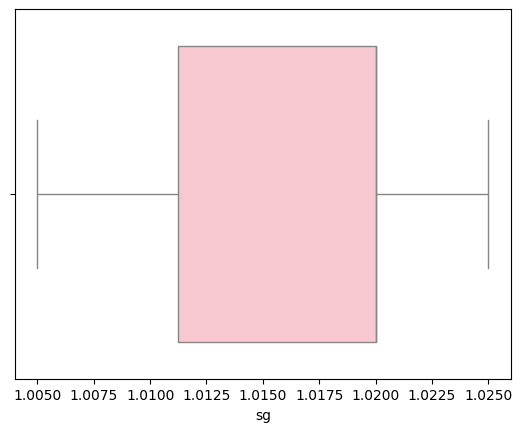

In [17]:
sns.boxplot(x = 'sg', data=df, color='pink')

### Albumin

<Axes: xlabel='al'>

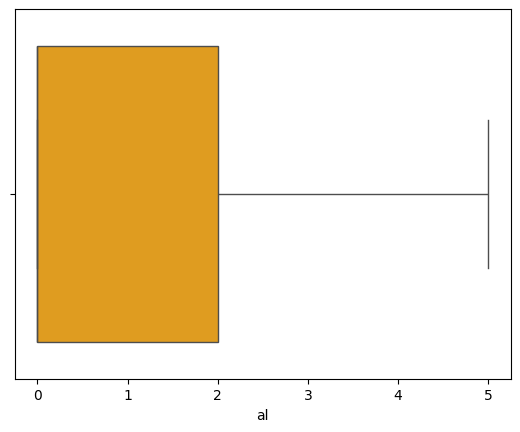

In [18]:
sns.boxplot(x = 'al', data=df, color='orange')

### Sugar

<Axes: xlabel='su'>

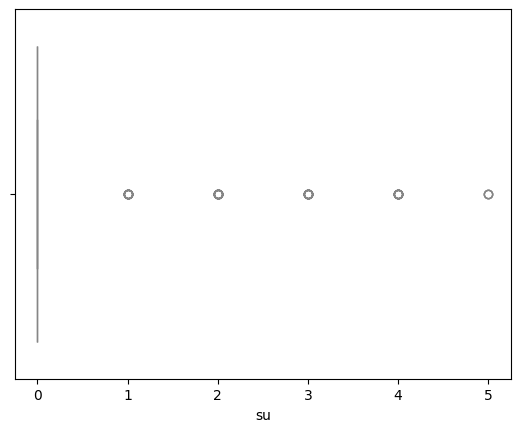

In [21]:
sns.boxplot(x = 'su', data=df, color='pink')

### Red blood cells

<Axes: xlabel='rbc'>

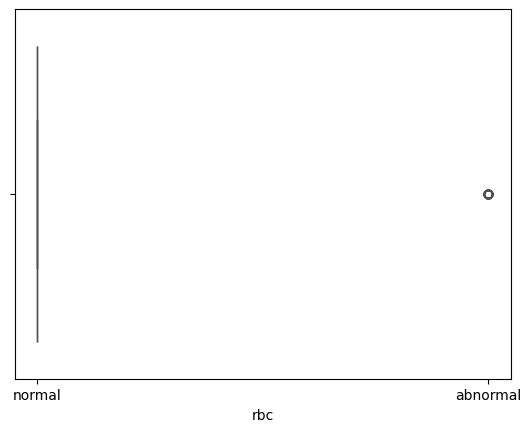

In [22]:
sns.boxplot(x = 'rbc', data=df, color='#da3074')

### Pus Cells

<Axes: xlabel='pc'>

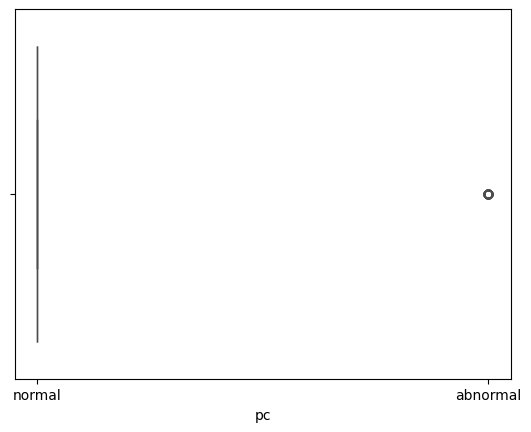

In [24]:
sns.boxplot(x = 'pc', data=df, color='Orange')

### Pus cells clumps

<Axes: xlabel='pcc'>

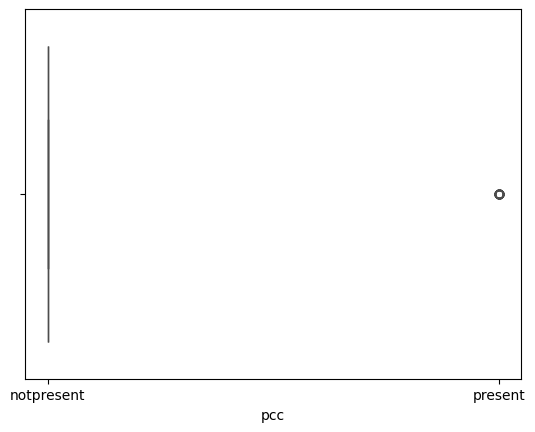

In [26]:
sns.boxplot(x = 'pcc', data=df, color='orange')

### Bacteria

<Axes: xlabel='ba'>

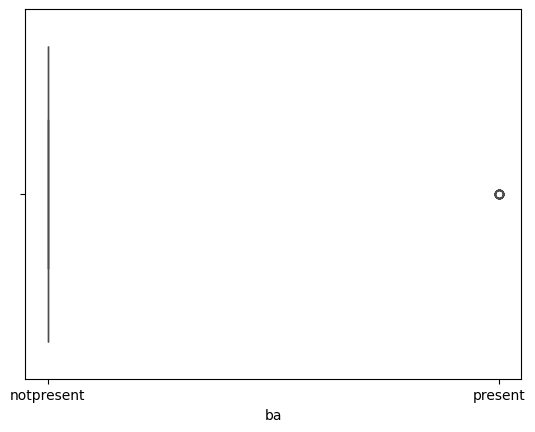

In [28]:
sns.boxplot(x = 'ba', data=df, color='Red')

### Blood glucose random

<Axes: xlabel='bgr'>

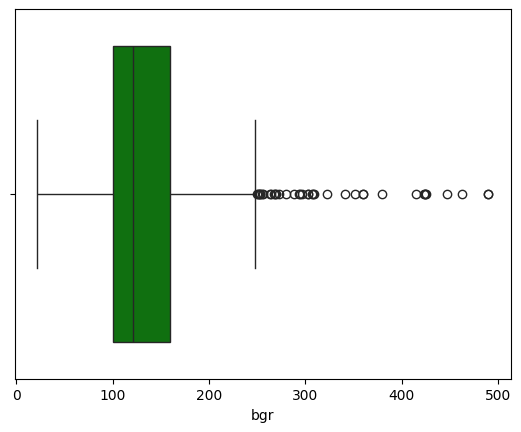

In [32]:
sns.boxplot(x = 'bgr', data=df, color='Green')

### Blood Urea

<Axes: xlabel='bu'>

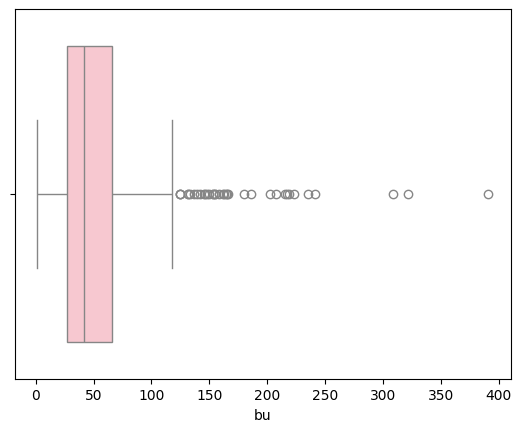

In [33]:
sns.boxplot(x = 'bu', data=df, color='Pink')

### Serum creatinine 

<Axes: xlabel='sc'>

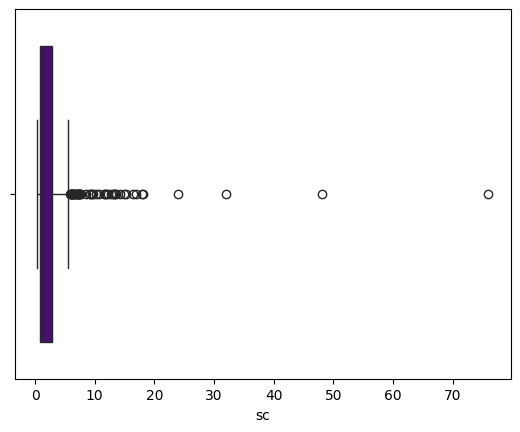

In [34]:
sns.boxplot(x = 'sc', data=df, color='Indigo')

### Sodium

<Axes: xlabel='sod'>

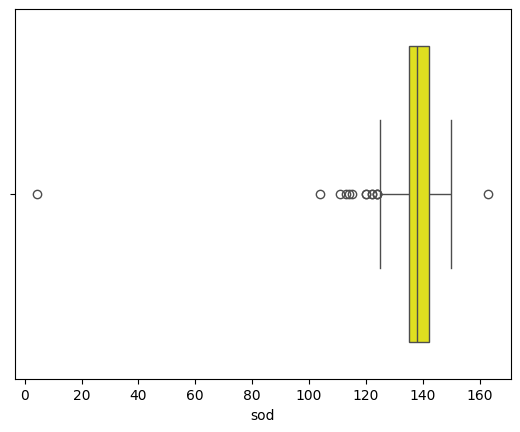

In [36]:
sns.boxplot(x = 'sod', data=df, color='Yellow')

### Potassium

<Axes: xlabel='pot'>

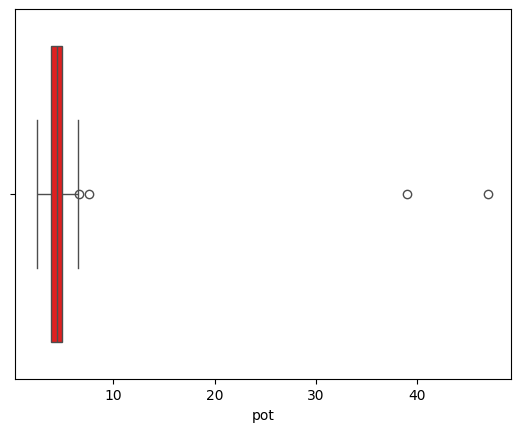

In [38]:
sns.boxplot(x = 'pot', data=df, color='Red')

### Haemoglobin

<Axes: xlabel='hemo'>

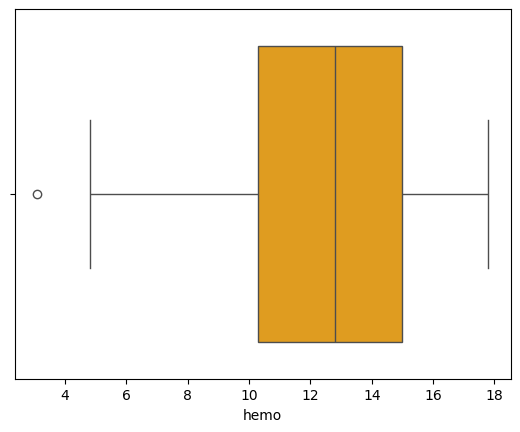

In [39]:
sns.boxplot(x = 'hemo', data=df, color='orange')

### Packed cell volume

<Axes: xlabel='pcv'>

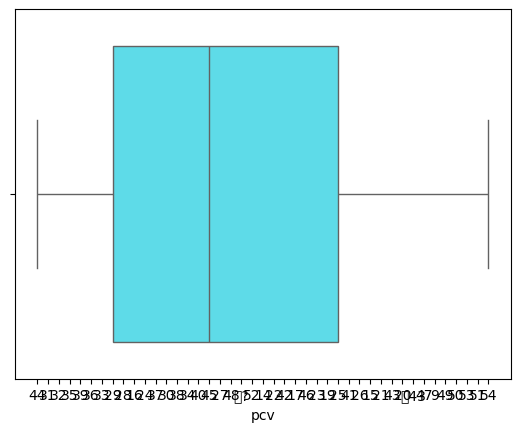

In [44]:
sns.boxplot(x = 'pcv', data=df, color='#47EEFF')

### White blood cell count

<Axes: xlabel='wc'>

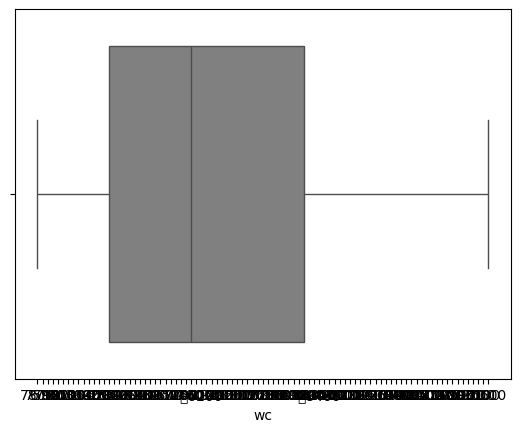

In [49]:
sns.boxplot(x = 'wc', data=df, color='Grey')

### Red blood cell count

<Axes: xlabel='rc'>

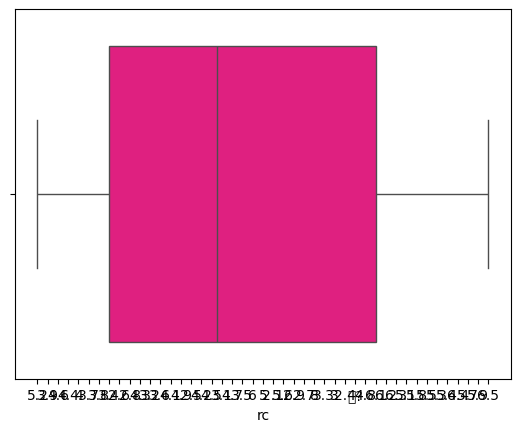

In [51]:
sns.boxplot(x = 'rc', data=df, color='#ff0080')

### Hypertension

<Axes: xlabel='htn'>

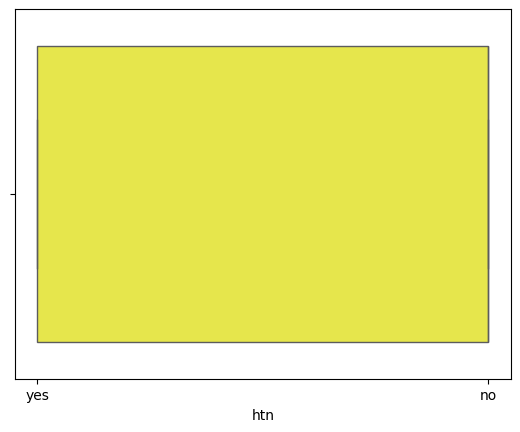

In [53]:
sns.boxplot(x = 'htn', data=df, color='#ffff33')

### Diabetes mellitus 

<Axes: xlabel='dm'>

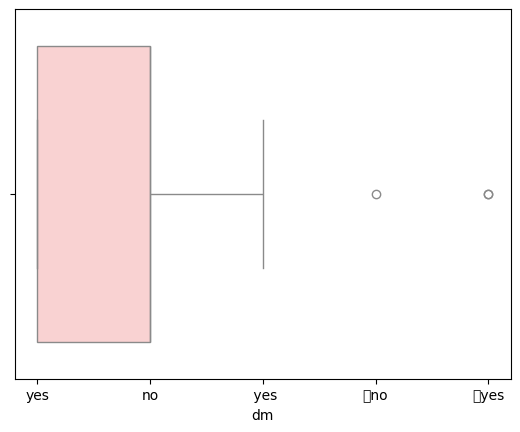

In [54]:
sns.boxplot(x = 'dm', data=df, color='#ffcccc')

### Coronary artery disease

<Axes: xlabel='cad'>

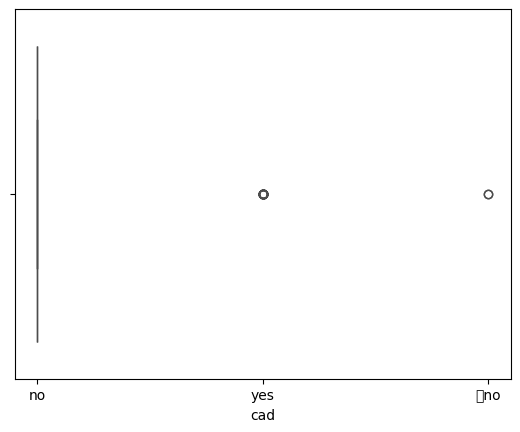

In [56]:
sns.boxplot(x = 'cad', data=df, color='Grey')

### Appetite  

<Axes: xlabel='appet'>

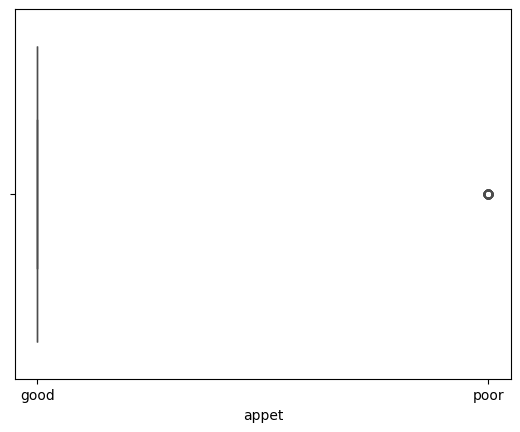

In [58]:
sns.boxplot(x = 'appet', data=df, color='Red')

### Peda edema

<Axes: xlabel='pe'>

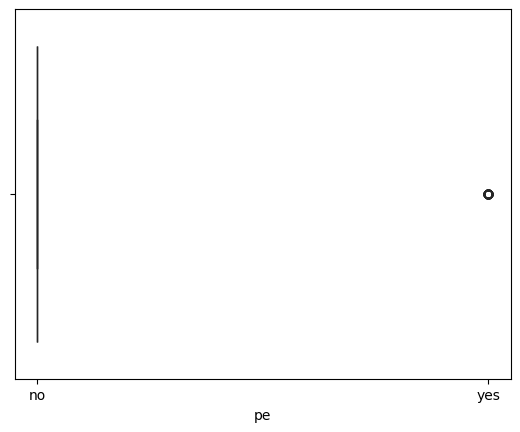

In [60]:
sns.boxplot(x = 'pe', data=df, color='Green')

### Anaemia   

<Axes: xlabel='ane'>

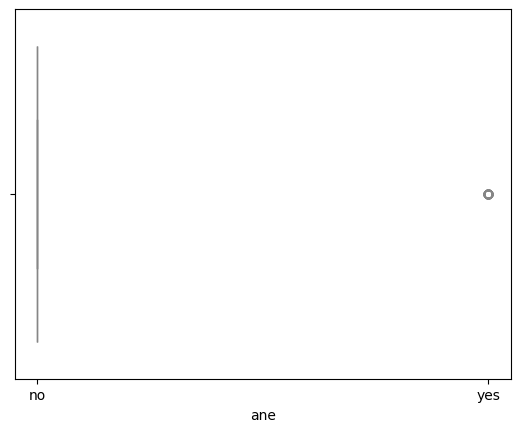

In [65]:
sns.boxplot(x = 'ane', data=df, color='Pink')


### Classification

<Axes: xlabel='classification'>

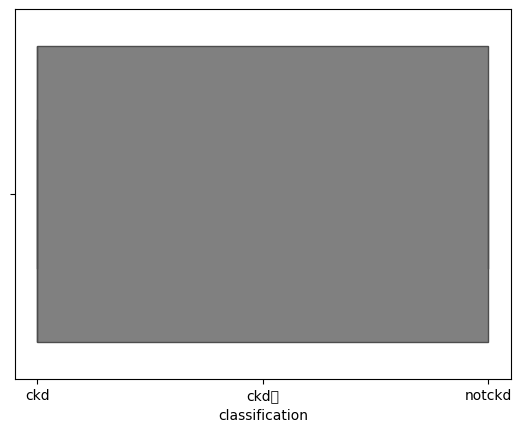

In [63]:
sns.boxplot(x = 'classification', data=df, color='Grey')

### Extracting categorical and numerical columns

In [67]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

### Looking at unique values in categorical columns

In [68]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

pcv has ['44' '31' '32' '35' '39' '36' '33' '29' '28' nan '16' '24' '37' '30' '38'
 '34' '40' '45' '27' '48' '\t?' '52' '14' '22' '42' '17' '46' '23' '19'
 '25' '41' '26' '15' '21' '43' '20' '\t43' '47' '9' '49' '50' '53' '51'
 '54'] values

wc has ['7800' '7500' '6700' '7300' nan '9600' '12100' '4500' '12200' '11000'
 '3800' '11400' '5300' '9200' '6200' '6900' '8300' '8400' '10300' '9800'
 '9100' '7900' '6400' '8600' '18900' '21600' '4300' '8500' '11300' '7200'
 '7700' '14600' '6300' '\t6200' '7100' '11800' '9400' '5500' '5800'
 '13200' '12500' '5600' '7000' '11900' '10700' '12700' '6800' '6500'
 '13600' '10200' '9000' '14900' '8200' '15200' '5000' '16300' '\t8400'
 '10500' '4200' '4700' '10900' '6000' '8100' '2200' '12800' '11200'
 '12400' '19100' '16700' '2600' '26400' '10400' '8800' '7400' '4900'
 '8000' '12000' 

## Step 6: Data Visualisation

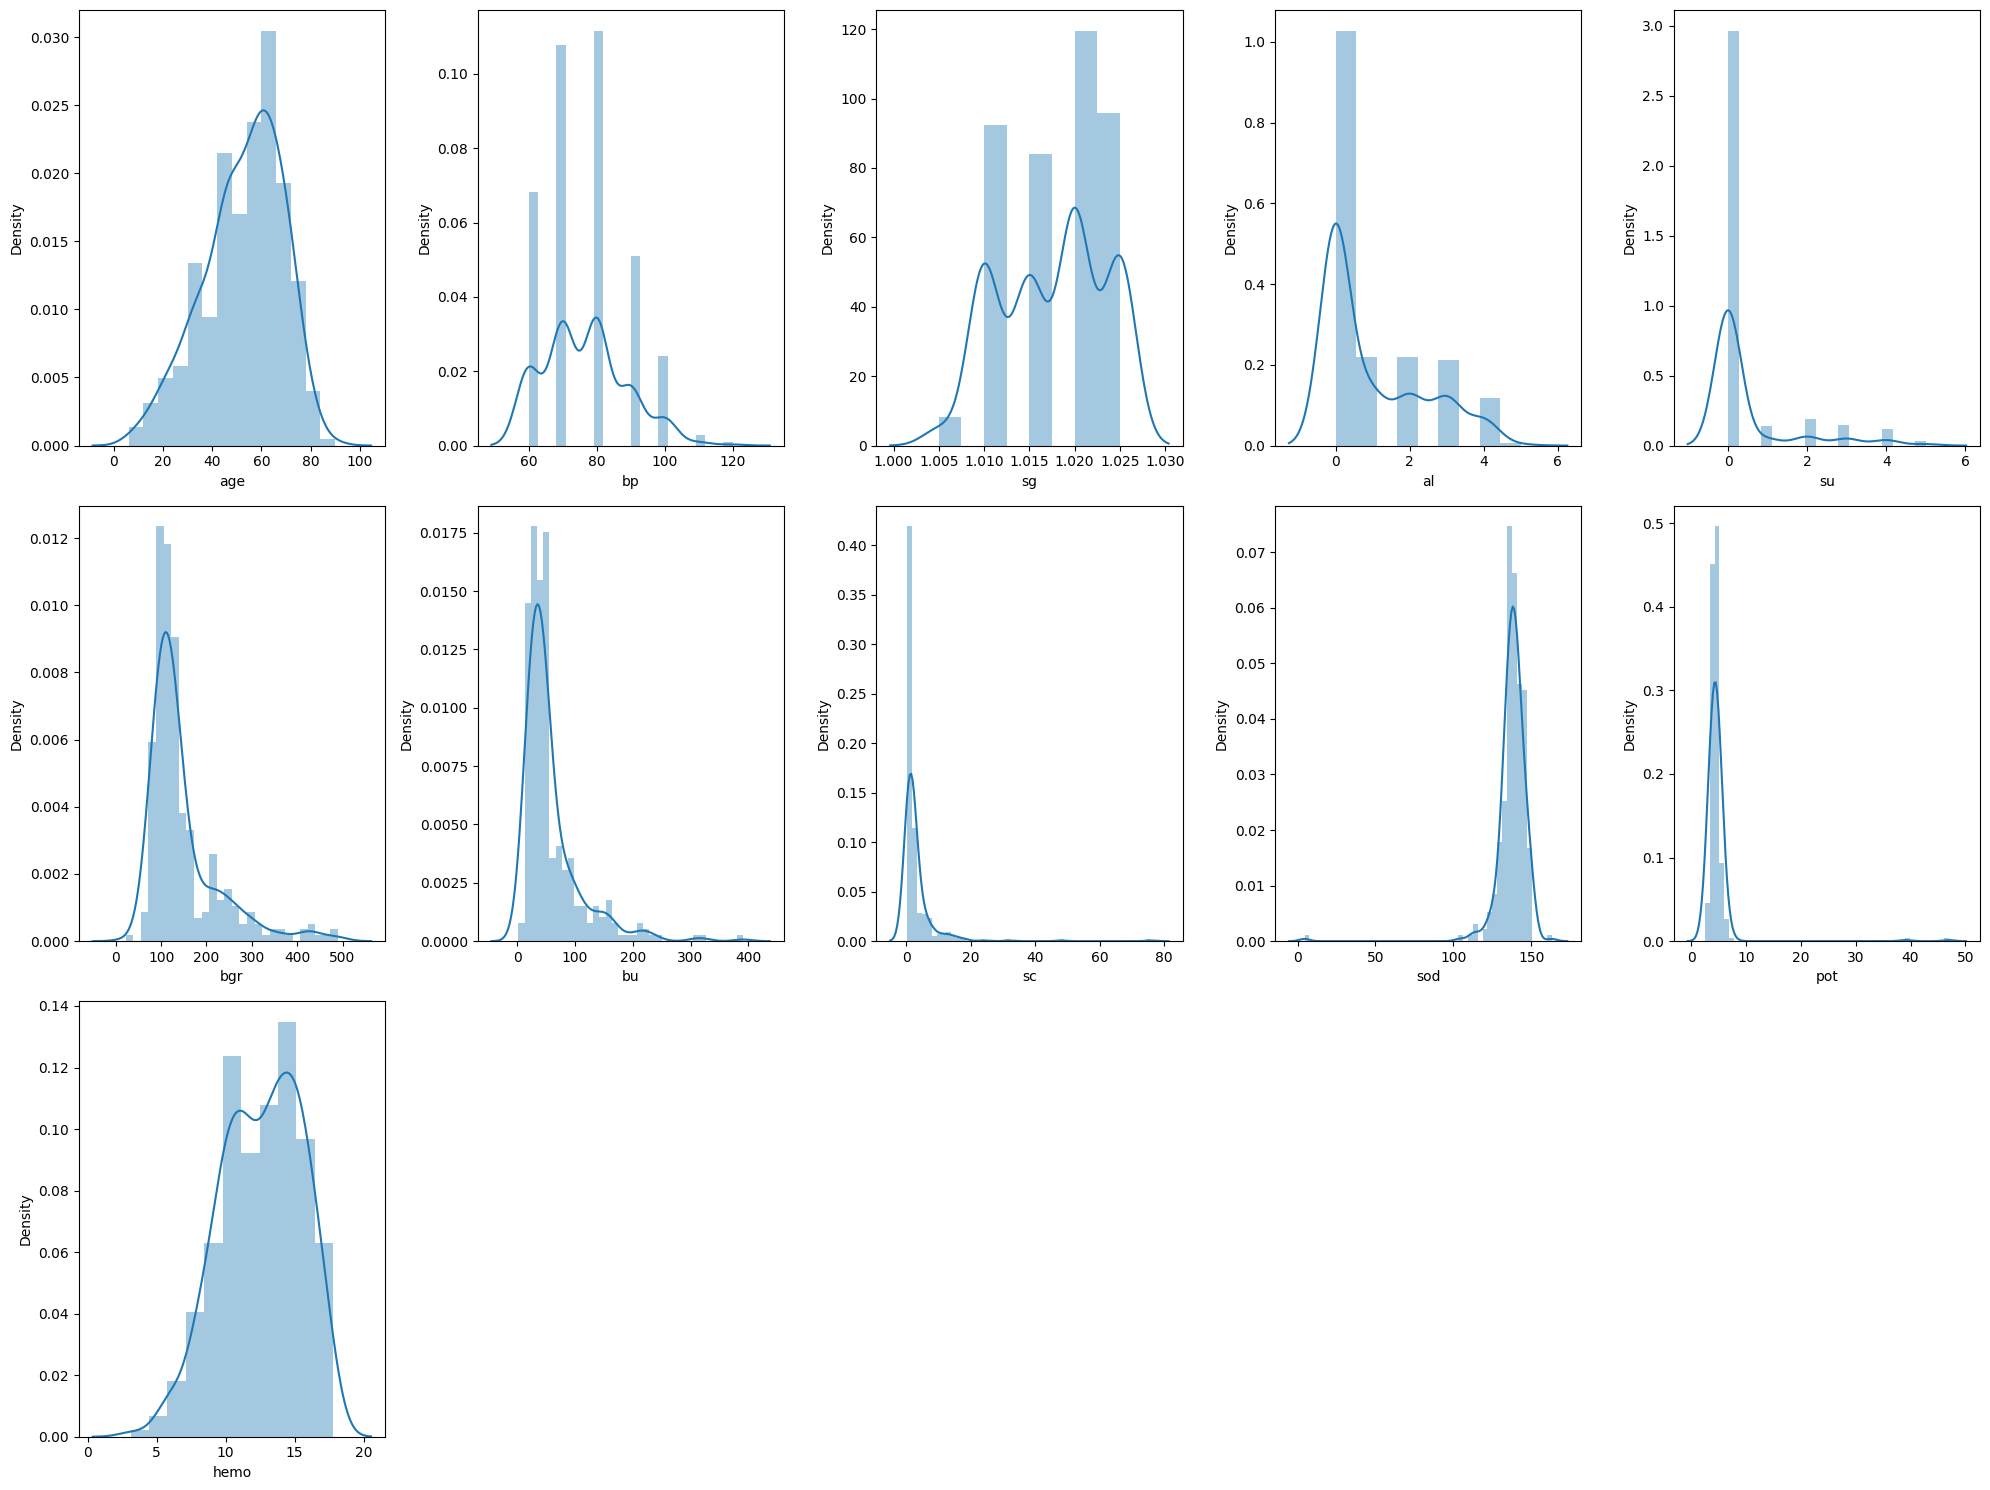

In [70]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

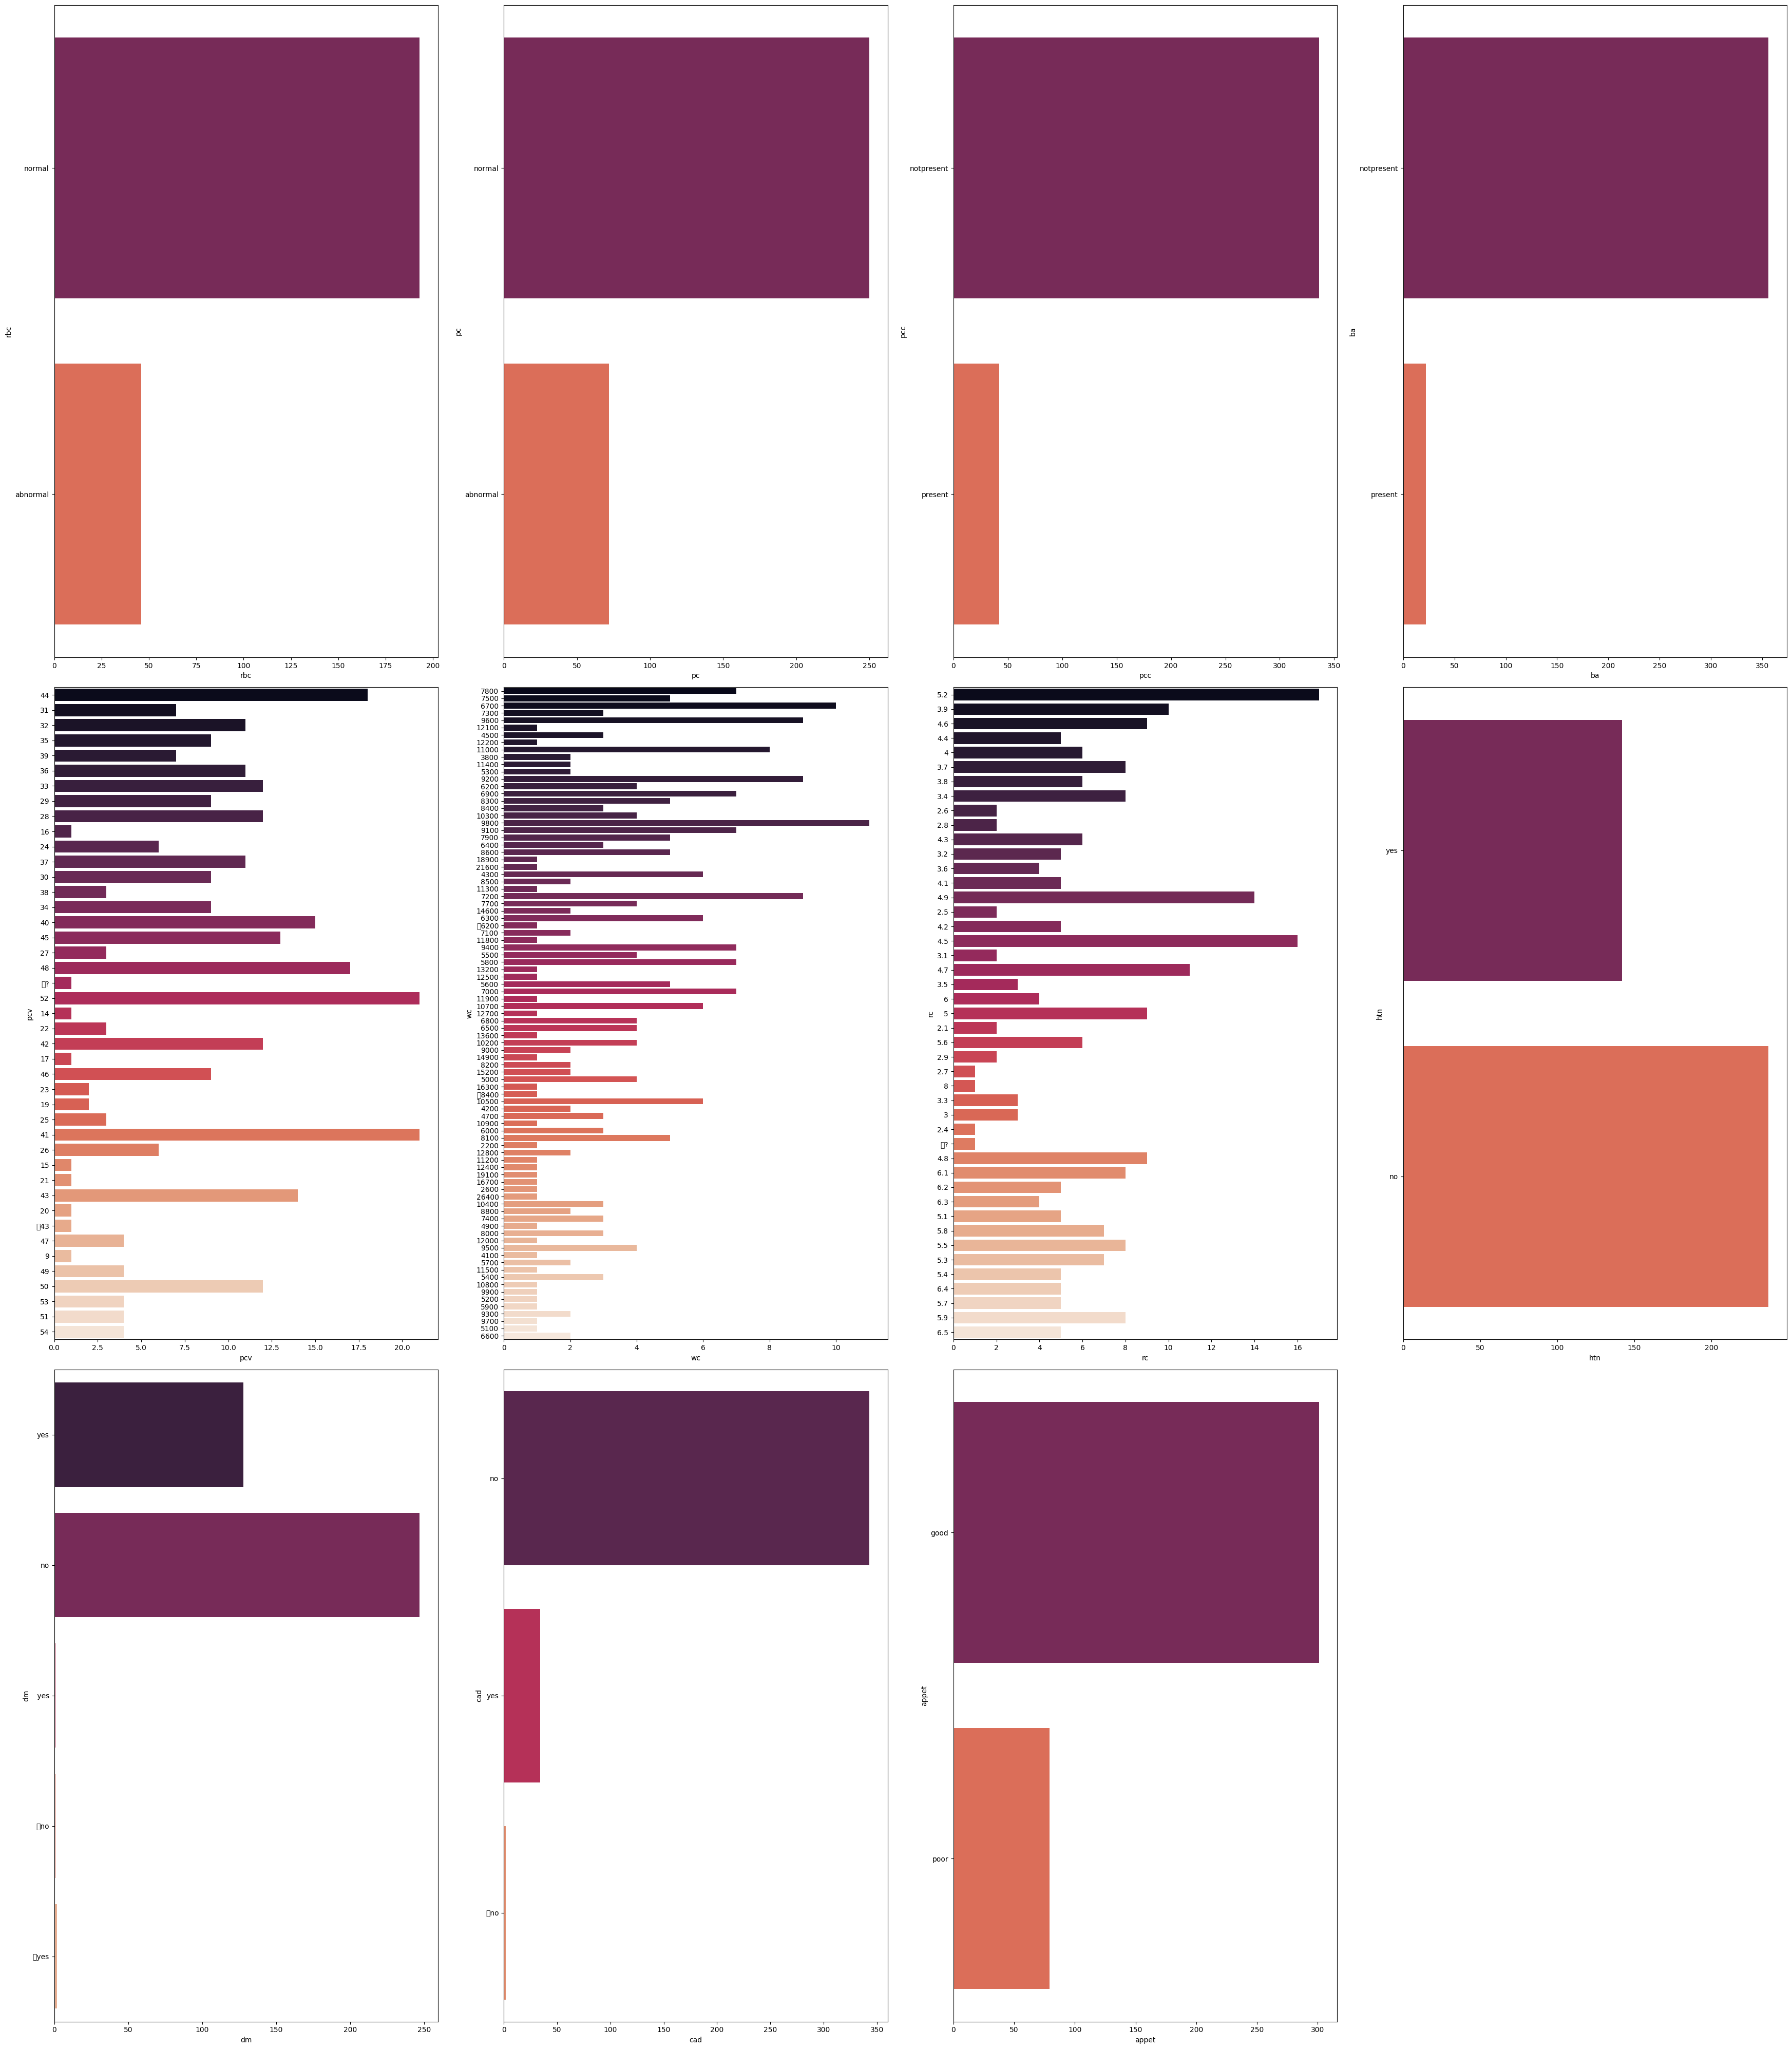

In [76]:
# looking at categorical columns

plt.figure(figsize = (35, 40))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

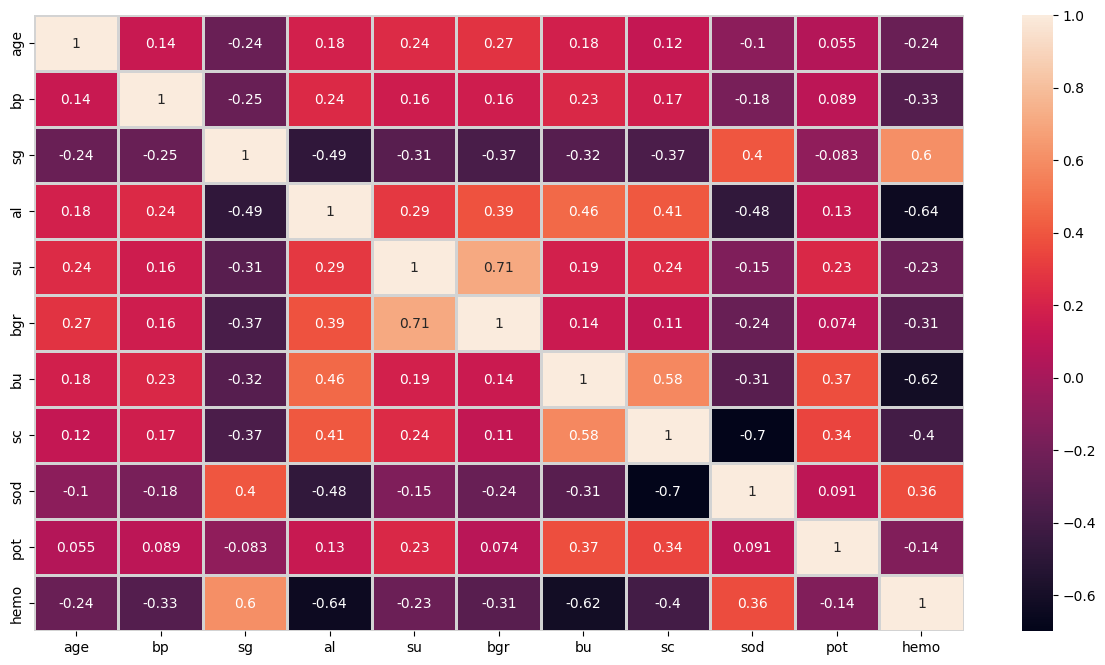

In [77]:
# heatmap of data

plt.figure(figsize = (15, 8))

sns.heatmap(df.corr(), annot = True, linewidths = 2, linecolor = 'lightgrey')
plt.show()

In [78]:
df.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

### Exploratory Data Analysis (EDA)

In [84]:
# defining functions to create plot

def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, template = 'plotly_dark')
    return fig.show()

def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()
    
def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, color="class", template = 'plotly_dark')
    return fig.show()

## Step 7: Data Modelling

* Train-Test-Split
* Fit the model to perform predictions
* Comparing the following algorithms to see which model performs the best